            calories  total_fat_pdv      sugar_pdv     sodium_pdv  \
count  231637.000000   231637.00000  231637.000000  231637.000000   
mean      473.942425       36.08070      84.296865      30.147485   
std      1189.711374       77.79884     800.080897     131.961589   
min         0.000000        0.00000       0.000000       0.000000   
25%       174.400000        8.00000       9.000000       5.000000   
50%       313.400000       20.00000      25.000000      14.000000   
75%       519.700000       41.00000      68.000000      33.000000   
max    434360.200000    17183.00000  362729.000000   29338.000000   

        protein_pdv  saturated_fat_pdv      carbs_pdv  
count  231637.00000      231637.000000  231637.000000  
mean       34.68186          45.589150      15.560403  
std        58.47248          98.235758      81.824560  
min         0.00000           0.000000       0.000000  
25%         7.00000           7.000000       4.000000  
50%        18.00000          23.000000    

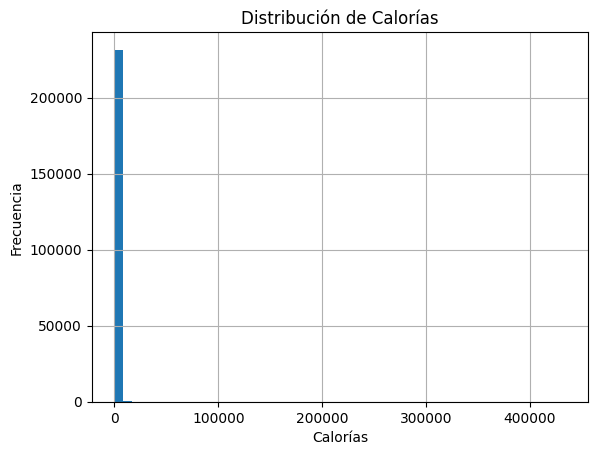

In [4]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

# 1) Carga el CSV
df = pd.read_csv("foodcom_data/RAW_recipes.csv")

# 2) Convierte la columna 'nutrition' en listas de floats
df['nutrition_list'] = df['nutrition'].apply(ast.literal_eval)

# 3) Desglosa la lista en 7 columnas
df[['calories',
    'total_fat_pdv',
    'sugar_pdv',
    'sodium_pdv',
    'protein_pdv',
    'saturated_fat_pdv',
    'carbs_pdv']] = pd.DataFrame(df['nutrition_list'].tolist(), index=df.index)

# 4) Observa estadísticas descriptivas
print(df[['calories','total_fat_pdv','sugar_pdv','sodium_pdv','protein_pdv','saturated_fat_pdv','carbs_pdv']].describe())

# 5) (Opcional) Histograma de calorías
df['calories'].hist(bins=50)
plt.title("Distribución de Calorías")
plt.xlabel("Calorías")
plt.ylabel("Frecuencia")
plt.show()

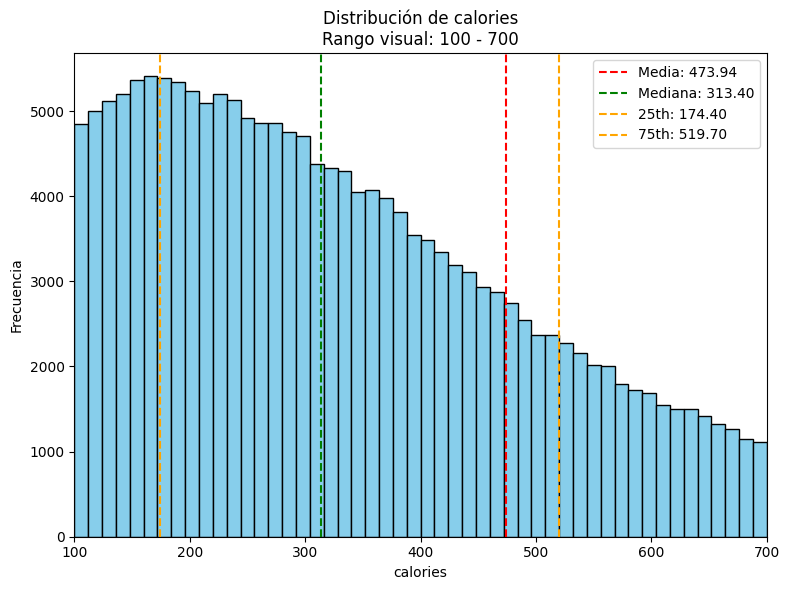

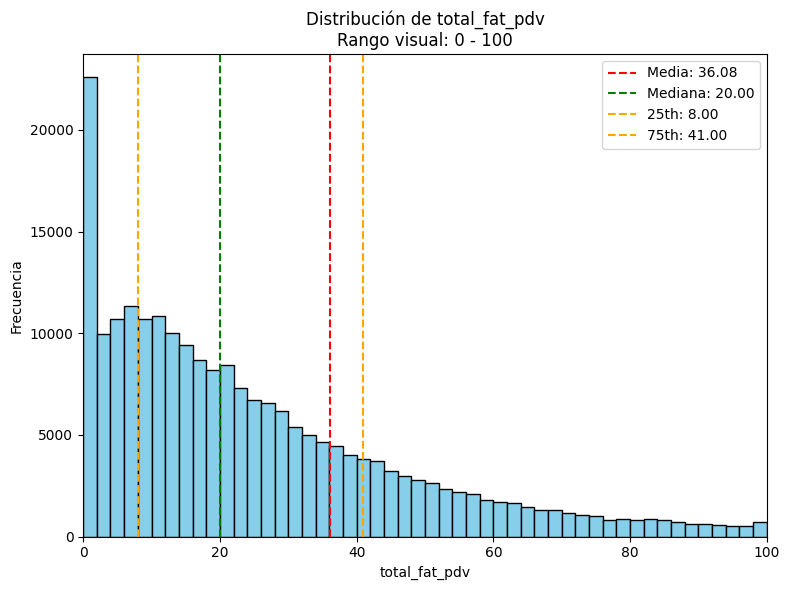

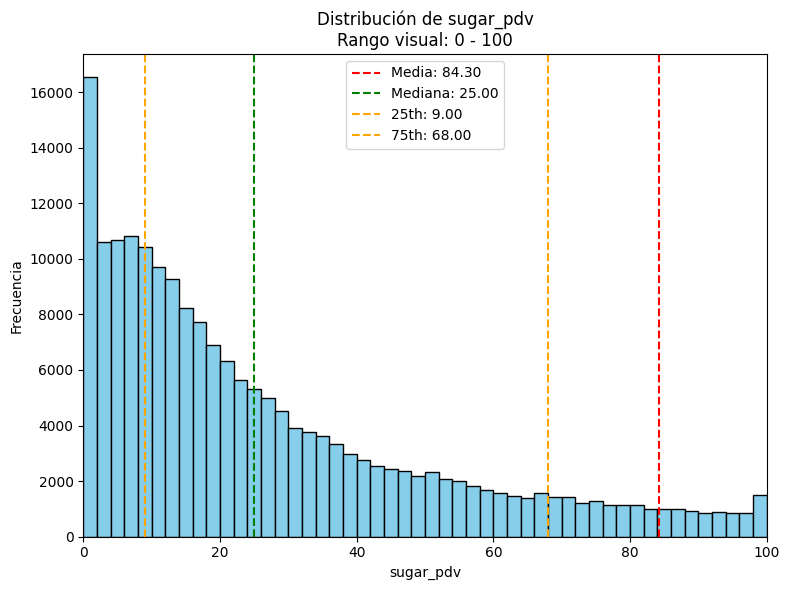

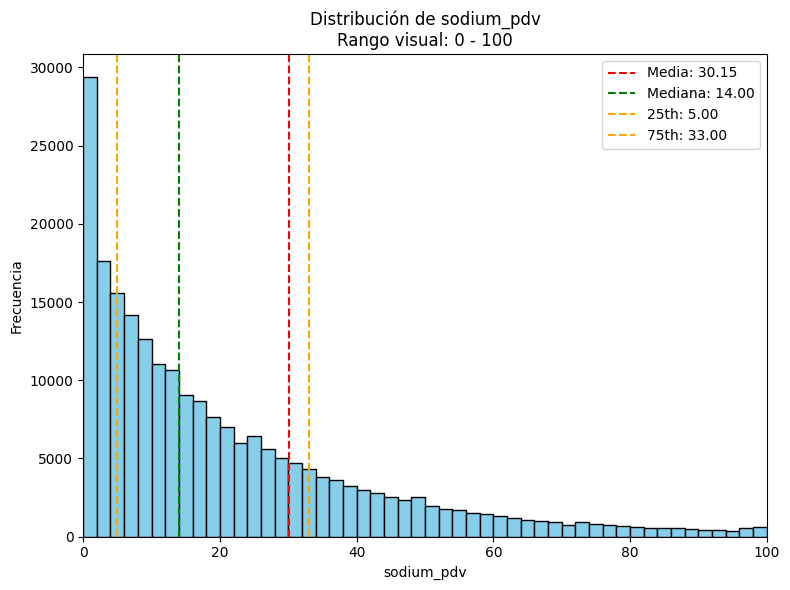

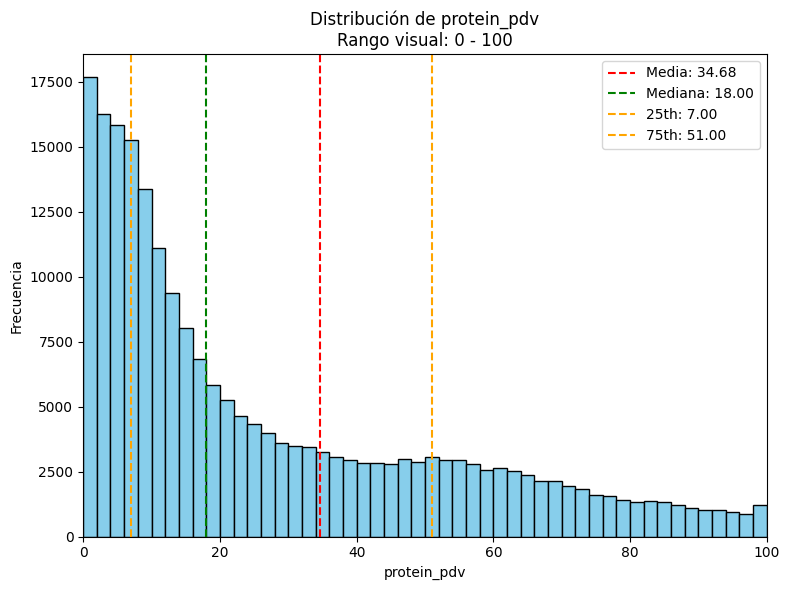

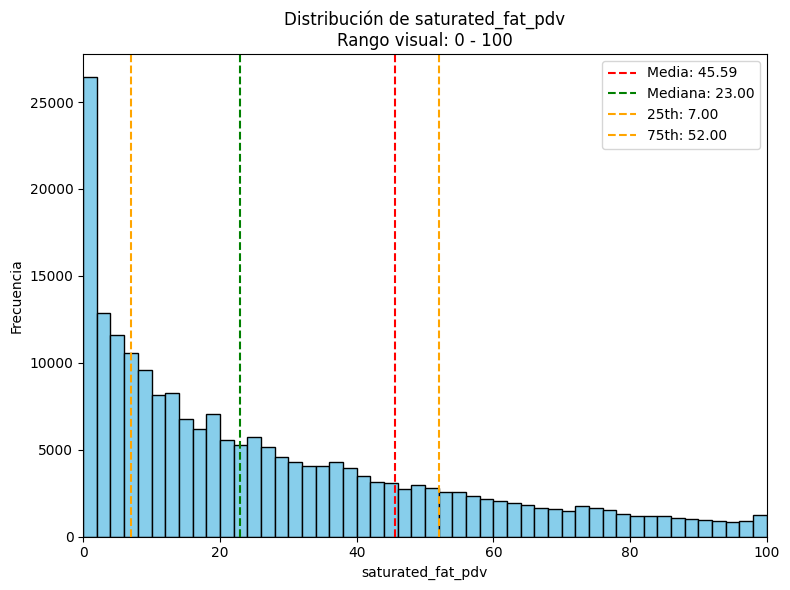

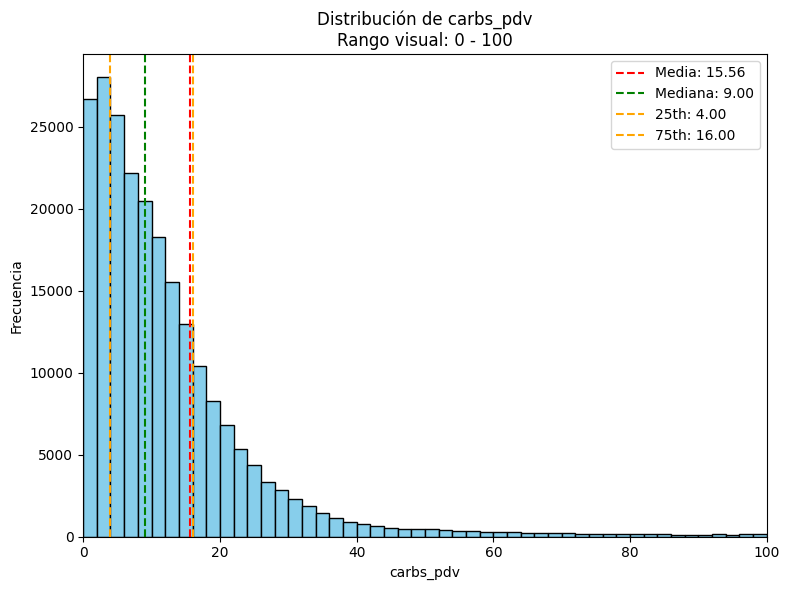

In [9]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt

# 1. Carga el CSV
df = pd.read_csv("foodcom_data/RAW_recipes.csv")

# 2. Convierte la columna 'nutrition' de string a lista de números
df['nutrition_list'] = df['nutrition'].apply(ast.literal_eval)

# 3. Desglosa la lista en 7 columnas:
nutri_cols = [
    'calories', 
    'total_fat_pdv', 
    'sugar_pdv', 
    'sodium_pdv', 
    'protein_pdv', 
    'saturated_fat_pdv',
    'carbs_pdv'
]
df[nutri_cols] = pd.DataFrame(df['nutrition_list'].tolist(), index=df.index)

# 4. Define los rangos fijos que quieres mostrar en el eje X para cada variable
xlim_ranges = {
    'calories': (100, 700),
    'total_fat_pdv': (0, 100),
    'sugar_pdv': (0, 100),
    'sodium_pdv': (0, 100),
    'protein_pdv': (0, 100),
    'saturated_fat_pdv': (0, 100),
    'carbs_pdv': (0, 100)
}

# 5. Genera un histograma para cada variable, mostrando también la media, mediana y percentiles 25 y 75
for col in nutri_cols:
    # Calcula estadísticas para anotaciones en el gráfico
    mean_val = df[col].mean()
    median_val = df[col].median()
    p25 = np.percentile(df[col], 25)
    p75 = np.percentile(df[col], 75)
    
    plt.figure(figsize=(8, 6))
    # Dibuja el histograma usando el rango fijo definido
    plt.hist(df[col], bins=50, range=xlim_ranges[col], color='skyblue', edgecolor='black')
    
    # Agrega líneas verticales para la media, mediana y percentiles
    plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'Media: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1.5, label=f'Mediana: {median_val:.2f}')
    plt.axvline(p25, color='orange', linestyle='dashed', linewidth=1.5, label=f'25th: {p25:.2f}')
    plt.axvline(p75, color='orange', linestyle='dashed', linewidth=1.5, label=f'75th: {p75:.2f}')
    
    plt.title(f"Distribución de {col}\nRango visual: {xlim_ranges[col][0]} - {xlim_ranges[col][1]}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.xlim(xlim_ranges[col])
    plt.legend()
    plt.tight_layout()
    plt.show()


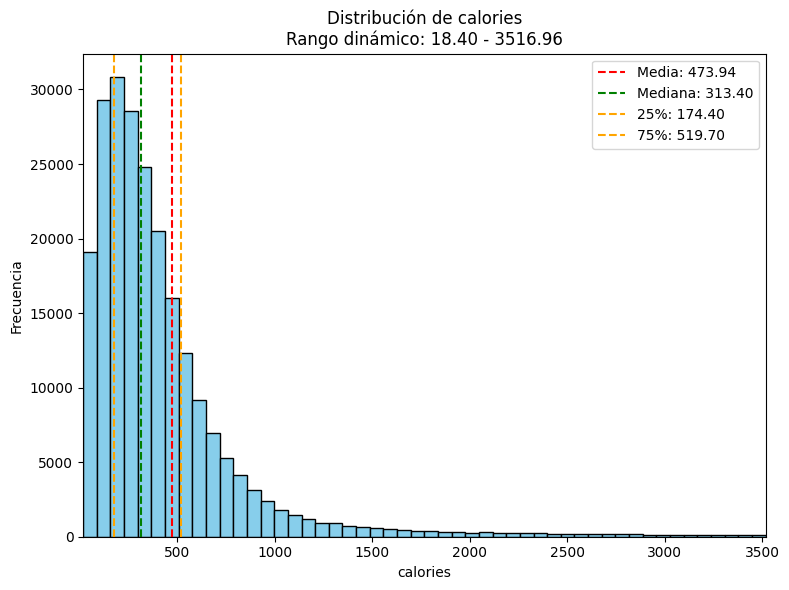

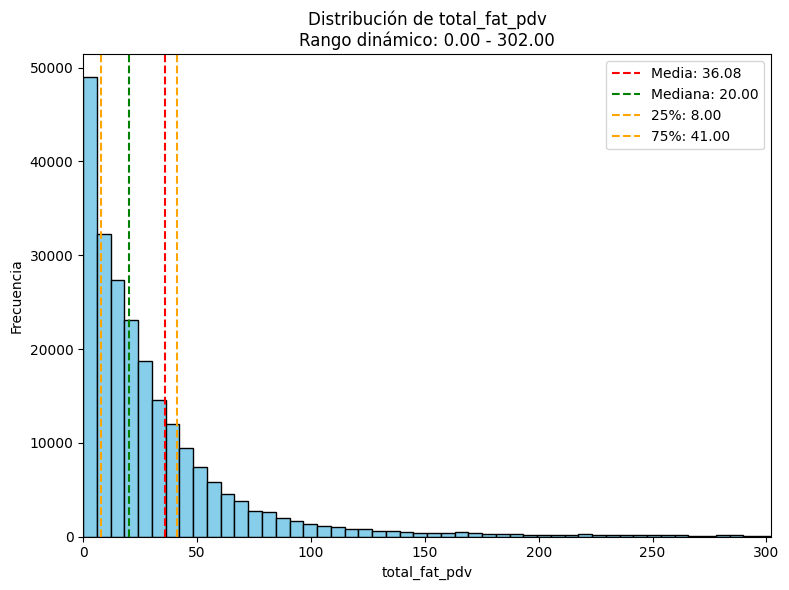

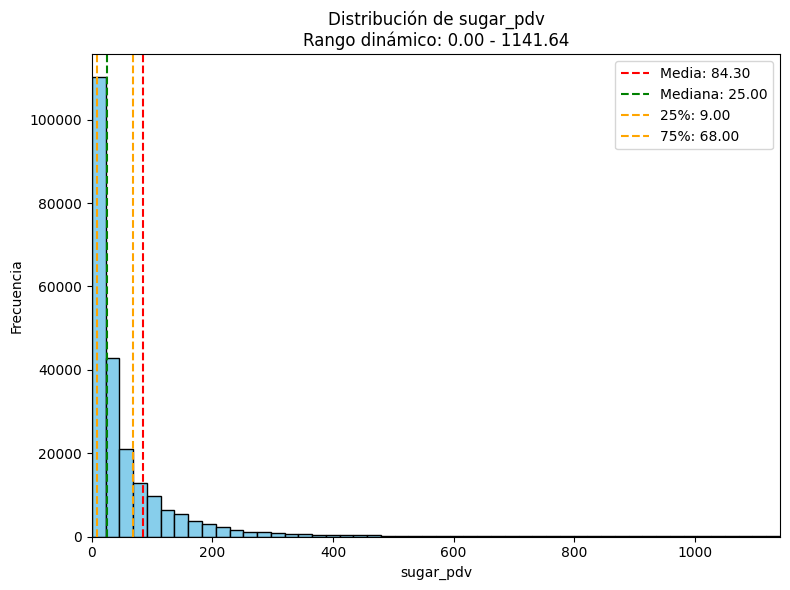

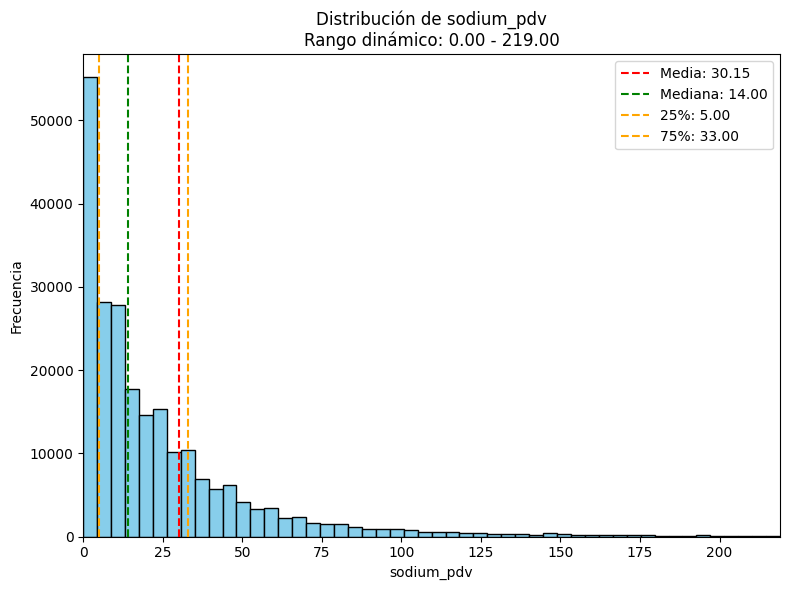

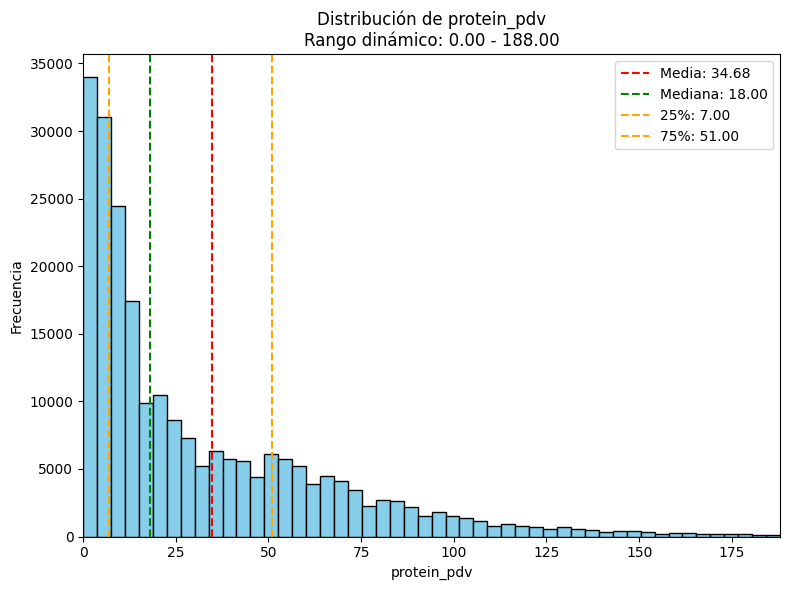

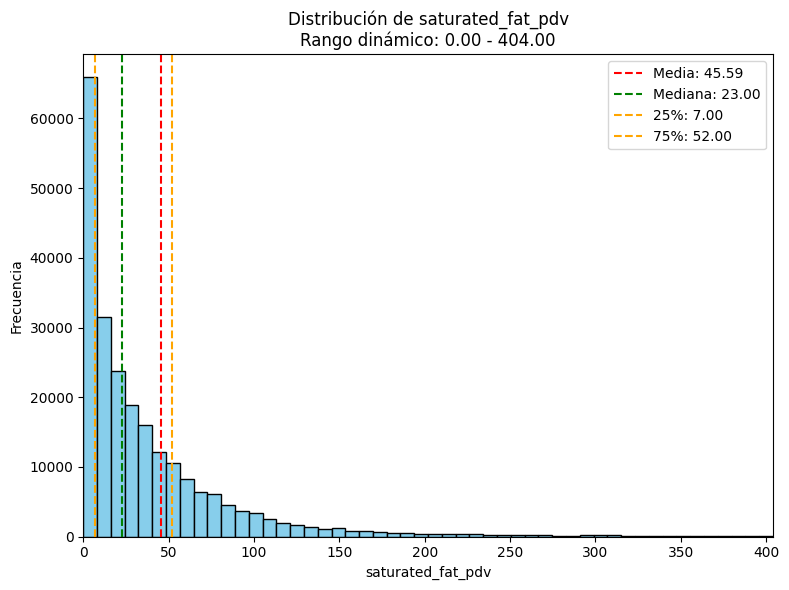

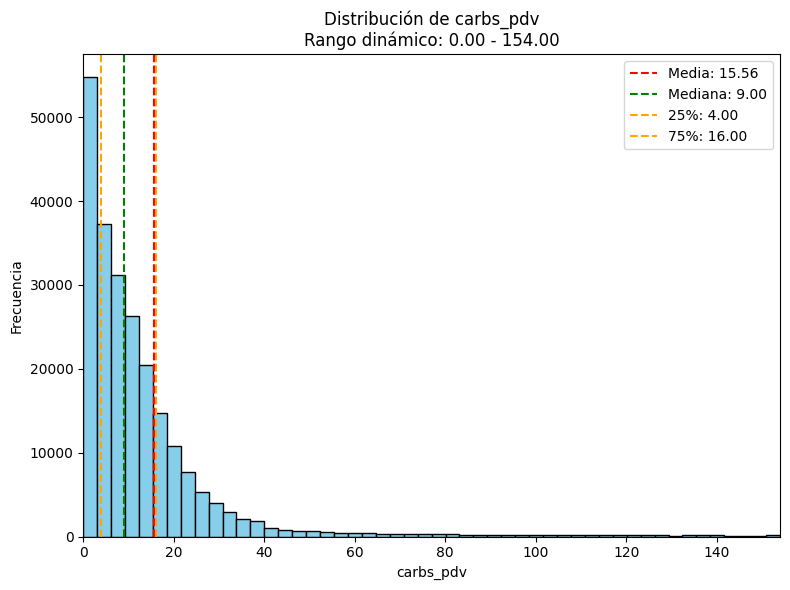

In [10]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt

# 1. Carga el CSV
df = pd.read_csv("foodcom_data/RAW_recipes.csv")

# 2. Convierte la columna 'nutrition' (cadena) en una lista de 7 valores
df['nutrition_list'] = df['nutrition'].apply(ast.literal_eval)

# 3. Separa la lista en 7 columnas: 
#    calories, total_fat_pdv, sugar_pdv, sodium_pdv, protein_pdv, saturated_fat_pdv, carbs_pdv
nutri_cols = [
    'calories',
    'total_fat_pdv',
    'sugar_pdv',
    'sodium_pdv',
    'protein_pdv',
    'saturated_fat_pdv',
    'carbs_pdv'
]
df[nutri_cols] = pd.DataFrame(df['nutrition_list'].tolist(), index=df.index)

# 4. Para cada columna, calcula límites dinámicos (por ejemplo, percentil 1 y 99)
for col in nutri_cols:
    data = df[col]
    
    # Calcula el 1er y 99º percentil para definir el rango visual
    lower_lim = np.percentile(data, 1)
    upper_lim = np.percentile(data, 99)
    
    # Calcula estadísticas
    mean_val = data.mean()
    median_val = data.median()
    p25 = np.percentile(data, 25)
    p75 = np.percentile(data, 75)
    
    plt.figure(figsize=(8, 6))
    # Histograma: los datos se agrupan en 50 bins dentro del rango definido dinámicamente
    plt.hist(data, bins=50, range=(lower_lim, upper_lim), color='skyblue', edgecolor='black')
    
    # Añade líneas verticales para media, mediana, percentil 25 y 75
    plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'Media: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1.5, label=f'Mediana: {median_val:.2f}')
    plt.axvline(p25, color='orange', linestyle='dashed', linewidth=1.5, label=f'25%: {p25:.2f}')
    plt.axvline(p75, color='orange', linestyle='dashed', linewidth=1.5, label=f'75%: {p75:.2f}')
    
    plt.title(f"Distribución de {col}\nRango dinámico: {lower_lim:.2f} - {upper_lim:.2f}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.xlim(lower_lim, upper_lim)
    plt.legend()
    plt.tight_layout()
    plt.show()


# HACIENDO ZOOM
Despreciando esos valores mas raros para ver la distribucion real

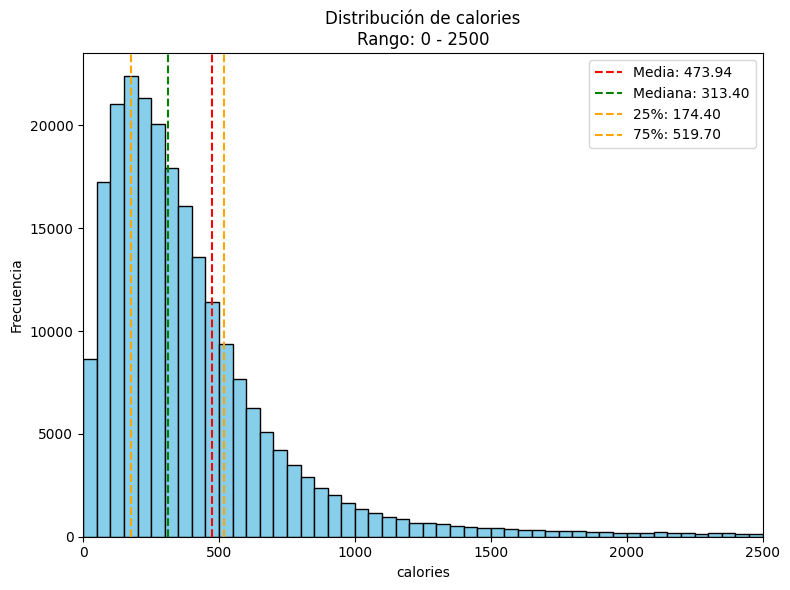

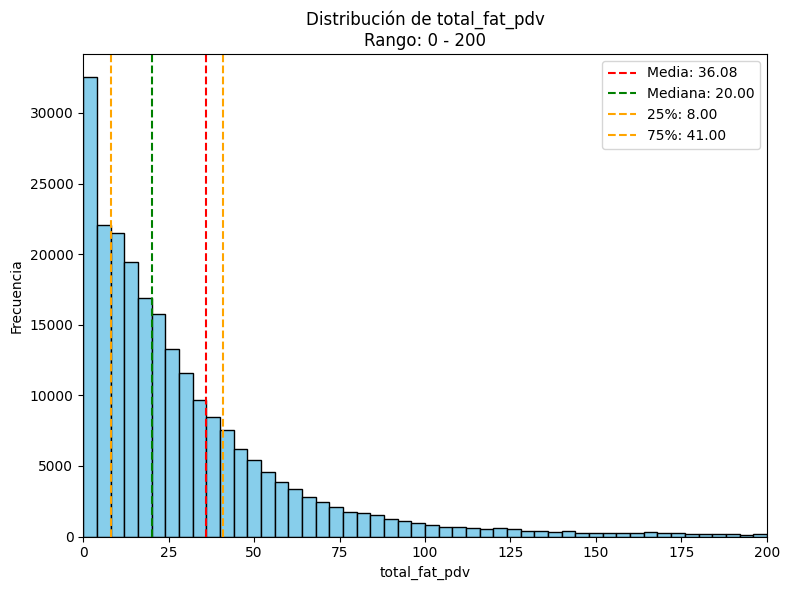

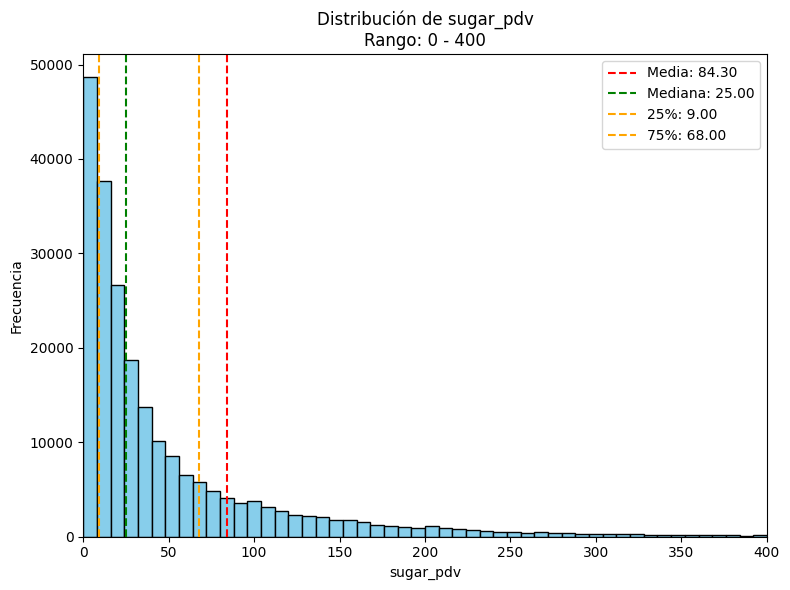

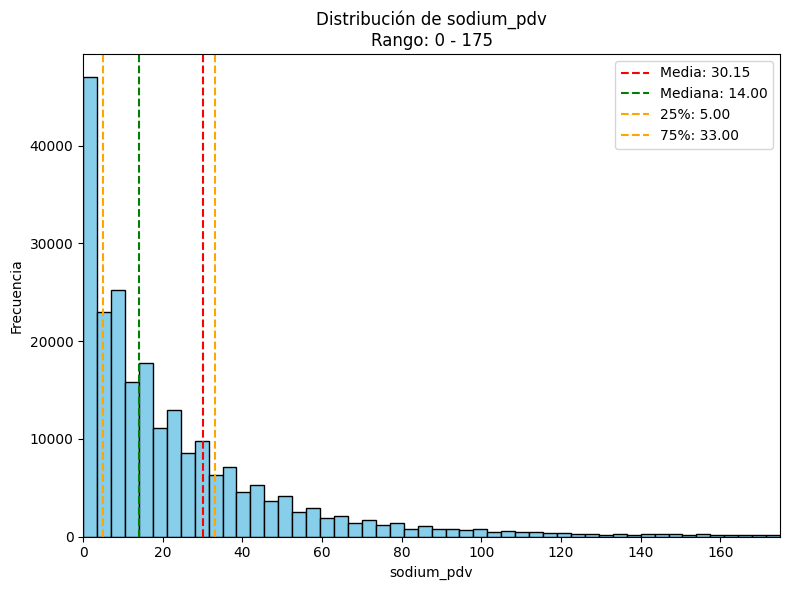

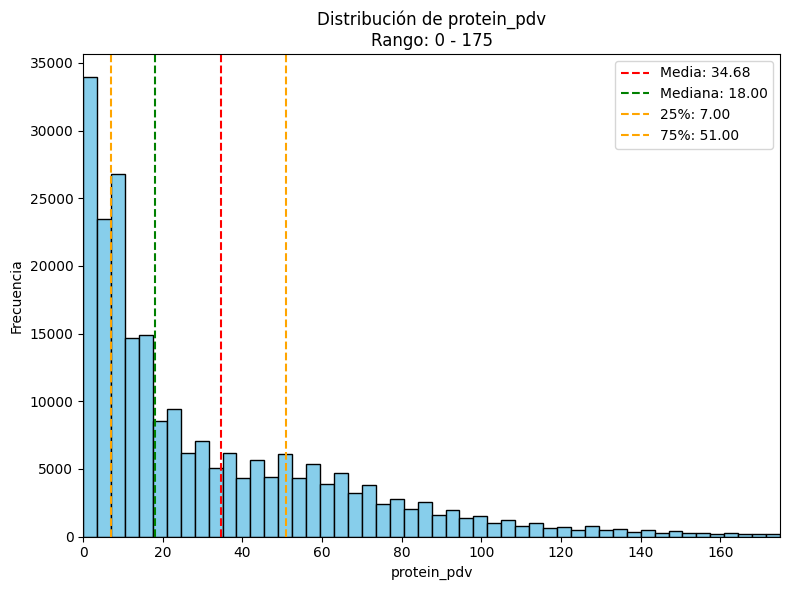

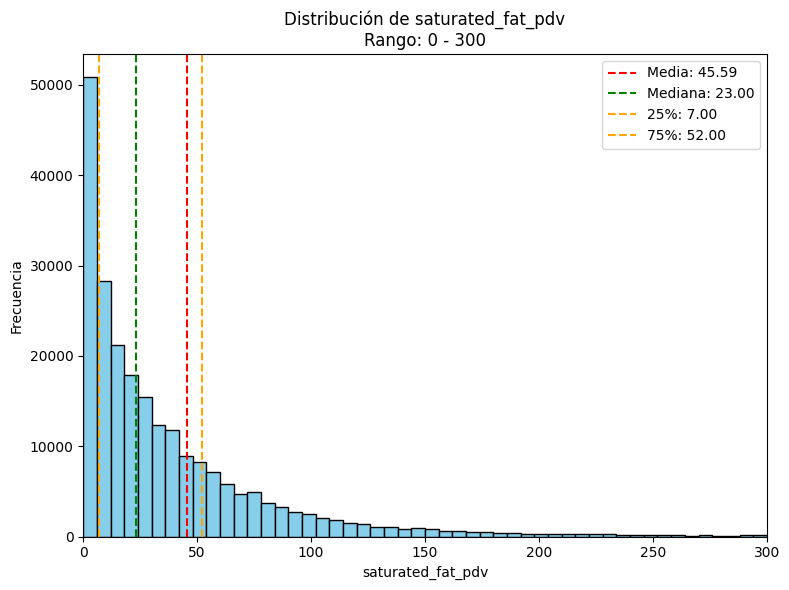

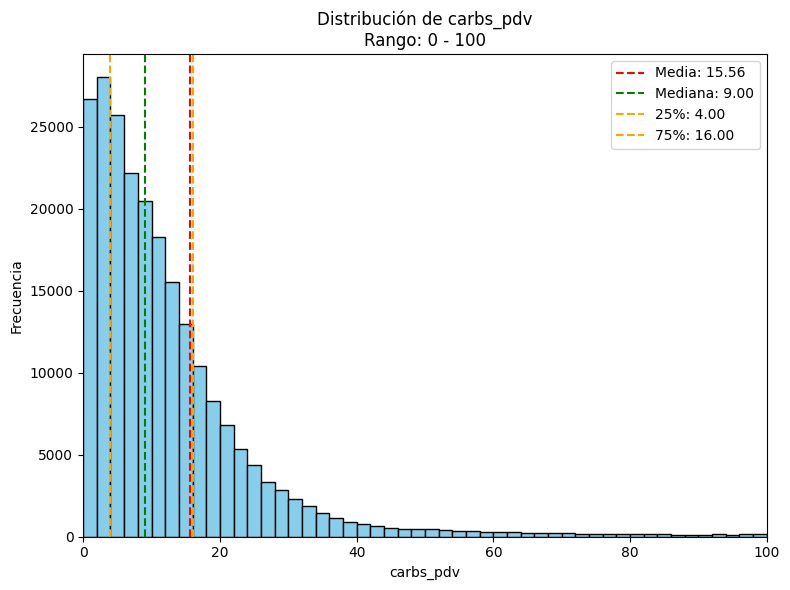

In [12]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt

# 1. Cargar el CSV
df = pd.read_csv("foodcom_data/RAW_recipes.csv")

# 2. Convertir la columna 'nutrition' (cadena) a una lista de números
df['nutrition_list'] = df['nutrition'].apply(ast.literal_eval)

# 3. Separar la lista en 7 columnas, en el orden correcto
nutri_cols = [
    'calories',
    'total_fat_pdv',
    'sugar_pdv',
    'sodium_pdv',
    'protein_pdv',
    'saturated_fat_pdv',
    'carbs_pdv'
]
df[nutri_cols] = pd.DataFrame(df['nutrition_list'].tolist(), index=df.index)

# 4. Definir los rangos fijos para el eje X de cada columna
xlim_ranges = {
    'calories': (0, 2500),
    'total_fat_pdv': (0, 200),
    'sugar_pdv': (0, 400),
    'sodium_pdv': (0, 175),
    'protein_pdv': (0, 175),
    'saturated_fat_pdv': (0, 300),
    'carbs_pdv': (0, 100)
}

# 5. Para cada columna, generar un histograma que muestre la distribución y dibujar líneas para la media, mediana, percentil 25 y 75
for col in nutri_cols:
    data = df[col]
    
    # Calcula estadísticas básicas
    mean_val = data.mean()
    median_val = data.median()
    p25 = np.percentile(data, 25)
    p75 = np.percentile(data, 75)
    
    plt.figure(figsize=(8, 6))
    # Histogram con el rango fijo definido
    plt.hist(data, bins=50, range=xlim_ranges[col], color='skyblue', edgecolor='black')
    
    # Líneas verticales para media, mediana y percentiles
    plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'Media: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1.5, label=f'Mediana: {median_val:.2f}')
    plt.axvline(p25, color='orange', linestyle='dashed', linewidth=1.5, label=f'25%: {p25:.2f}')
    plt.axvline(p75, color='orange', linestyle='dashed', linewidth=1.5, label=f'75%: {p75:.2f}')
    
    plt.title(f"Distribución de {col}\nRango: {xlim_ranges[col][0]} - {xlim_ranges[col][1]}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.xlim(xlim_ranges[col])
    plt.legend()
    plt.tight_layout()
    plt.show()


**Conclusiones sobre las distribuciones nutricionales**  
*(Basado en las gráficas y los estadísticos de media, mediana, percentiles, etc.)*


### 1. Calorías (`calories`)
- **Rango dinámico mostrado:** ~18 a ~3517  
- **Media:** ~474  
- **Mediana:** ~313  
- **Percentil 25:** ~174  
- **Percentil 75:** ~520  
**Interpretación:**  
  - La media (474) es significativamente mayor que la mediana (313), lo cual indica una **distribución asimétrica hacia la derecha** (right-skewed).  
  - Muchas recetas se concentran por debajo de ~500 calorías, pero existe un grupo relativamente pequeño con calorías muy elevadas, lo que empuja la media al alza.


### 2. Grasas totales (%VD) (`total_fat_pdv`)
- **Rango dinámico mostrado:** 0 a ~302  
- **Media:** ~36  
- **Mediana:** ~20  
- **Percentil 25:** ~8  
- **Percentil 75:** ~41  
**Interpretación:**  
  - También se observa una **asimetría derecha**: la mediana (20) está por debajo de la media (36).  
  - La mayoría de recetas presenta porcentajes de grasa relativamente moderados, pero algunas alcanzan valores muy altos que elevan la media.


### 3. Azúcar (%VD) (`sugar_pdv`)
- **Rango dinámico mostrado:** 0 a ~1142  
- **Media:** ~84  
- **Mediana:** ~25  
- **Percentil 25:** ~9  
- **Percentil 75:** ~68  
**Interpretación:**  
  - Existe una gran diferencia entre la media (84) y la mediana (25), lo cual denota un **grupo pequeño con valores de azúcar extremadamente altos**.  
  - La mayoría de las recetas se sitúa por debajo de ~70-100, pero unos pocos valores por encima de 100 (o 200, 300, etc.) disparan la media.


### 4. Sodio (%VD) (`sodium_pdv`)
- **Rango dinámico mostrado:** 0 a ~219  
- **Media:** ~30  
- **Mediana:** ~14  
- **Percentil 25:** ~5  
- **Percentil 75:** ~33  
**Interpretación:**  
  - El valor medio (30) duplica la mediana (14), revelando otra **distribución sesgada** hacia valores altos.  
  - Muchas recetas tienen un aporte de sodio moderado (por debajo de ~30), pero un subconjunto notable alcanza cifras más elevadas.

### 5. Proteínas (%VD) (`protein_pdv`)
- **Rango dinámico mostrado:** 0 a ~188  
- **Media:** ~35  
- **Mediana:** ~18  
- **Percentil 25:** ~7  
- **Percentil 75:** ~51  
**Interpretación:**  
  - Con una mediana de 18 frente a una media de 35, se mantiene la **tendencia de valores extremos** que elevan la media.  
  - La mayoría de recetas están por debajo de 50-60% VD en proteínas, pero hay un grupo pequeño muy elevado.


### 6. Grasas saturadas (%VD) (`saturated_fat_pdv`)
- **Rango dinámico mostrado:** 0 a ~404  
- **Media:** ~46  
- **Mediana:** ~23  
- **Percentil 25:** ~7  
- **Percentil 75:** ~52  
**Interpretación:**  
  - Se evidencia otra **distribución fuertemente asimétrica**: la media (46) es aproximadamente el doble de la mediana (23).  
  - La mayoría de las recetas no superan ~50-60% VD de grasas saturadas, pero hay outliers muy altos que elevan la media.


### 7. Carbohidratos (%VD) (`carbs_pdv`)
- **Rango dinámico mostrado:** 0 a ~154  
- **Media:** ~16  
- **Mediana:** ~9  
- **Percentil 25:** ~4  
- **Percentil 75:** ~16  
**Interpretación:**  
  - Se mantiene la **asimetría**: la media (16) supera la mediana (9).  
  - Aun así, la diferencia no es tan extrema como en azúcar o grasas saturadas, aunque sigue habiendo valores que llegan hasta ~100-150 y arrastran la media al alza.


## Observaciones Generales

- **Tendencia a la asimetría derecha (right-skewed)** en todas las variables: la mayoría de los nutrientes se concentran en rangos moderados, pero **un subconjunto pequeño** presenta valores muy elevados (outliers), elevando la media por encima de la mediana.
- **Valores atípicos**: Se aprecian en calorías, azúcar y grasas saturadas especialmente, lo que indica recetas con aportes extremadamente altos en esos nutrientes.
- **Comparación Media vs. Mediana**: En todas las categorías, la media > mediana, confirmando la existencia de colas largas en la distribución.
- **Interpretación práctica**: Para muchas recetas, el aporte nutricional es moderado, pero hay casos con cifras muy altas que podrían corresponder a platos muy calóricos o con alta densidad de nutrientes (azúcares, grasas), distorsionando la media.

Este análisis sugiere que, a la hora de representar los datos, **usar la mediana y los cuartiles** (p25, p75) puede ser más representativo de la receta “típica” que la media, dada la fuerte presencia de outliers en cada categoría.

# Criterio de Clasificación Nutricional

Para clasificar cada receta según su aporte nutricional en cada una de las siguientes categorías, se utilizarán los percentiles (25º y 75º) obtenidos de la distribución de valores en el dataset. Así, cada variable se definirá en tres rangos:

- **Bajo:** Valores inferiores al 25º percentil.
- **Medio:** Valores entre el 25º y el 75º percentil.
- **Alto:** Valores superiores al 75º percentil.

A continuación, se detallan los criterios para cada categoría basados en los análisis realizados:


## 1. Calorías (`calories`)
- **Bajo:** Menos de 174  
- **Medio:** Entre 174 y 520  
- **Alto:** Más de 520  

*Interpretación:* La mayoría de las recetas tienen menos de 520 calorías; valores muy altos (más de 520) se consideran atípicos.


## 2. Grasa Total (%PDV) (`total_fat_pdv`)
- **Bajo:** Menos de 8  
- **Medio:** Entre 8 y 41  
- **Alto:** Más de 41  

*Interpretación:* La mayoría de las recetas presentan moderación en el aporte de grasa, mientras que valores por encima de 41% se consideran altos.


## 3. Azúcares (%PDV) (`sugar_pdv`)
- **Bajo:** Menos de 9  
- **Medio:** Entre 9 y 68  
- **Alto:** Más de 68  

*Interpretación:* Aunque la mayoría de las recetas tienen niveles bajos a moderados de azúcar, algunas alcanzan niveles muy altos (más de 68%), elevando la media.


## 4. Sodio (%PDV) (`sodium_pdv`)
- **Bajo:** Menos de 5  
- **Medio:** Entre 5 y 33  
- **Alto:** Más de 33  

*Interpretación:* La distribución sugiere que la mayoría de las recetas tienen sodio en niveles bajos a moderados; valores superiores a 33% se considerarían altos.


## 5. Proteínas (%PDV) (`protein_pdv`)
- **Bajo:** Menos de 7  
- **Medio:** Entre 7 y 51  
- **Alto:** Más de 51  

*Interpretación:* Las recetas típicamente ofrecen un aporte moderado de proteínas; niveles por encima de 51% se catalogan como altos.


## 6. Grasas Saturadas (%PDV) (`saturated_fat_pdv`)
- **Bajo:** Menos de 7  
- **Medio:** Entre 7 y 52  
- **Alto:** Más de 52  

*Interpretación:* La mayoría de las recetas tienen niveles relativamente bajos de grasas saturadas; valores mayores a 52% indican un aporte elevado.


## 7. Carbohidratos (%PDV) (`carbs_pdv`)
- **Bajo:** Menos de 4  
- **Medio:** Entre 4 y 16  
- **Alto:** Más de 16  

*Interpretación:* La mayoría de las recetas contienen niveles bajos a moderados de carbohidratos, y valores superiores a 16% se consideran altos.


Estos criterios se basan en el análisis de la distribución general de cada variable en el dataset y permiten clasificar cada receta en términos de bajo, medio o alto aporte nutricional para cada categoría.
